In [37]:
import pandas as pd

# Load the Weekly Dataset (replace 'path/to/weekly_dataset.csv' with the actual path)
weekly_data = pd.read_csv('/Users/tasmia/Downloads/weekly.csv')

# Display the first few rows of the dataset for verification
print(weekly_data.head())

   Year   Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Today Direction
0  1990  0.816  1.572 -3.936 -0.229 -3.484  0.154976 -0.270      Down
1  1990 -0.270  0.816  1.572 -3.936 -0.229  0.148574 -2.576      Down
2  1990 -2.576 -0.270  0.816  1.572 -3.936  0.159837  3.514        Up
3  1990  3.514 -2.576 -0.270  0.816  1.572  0.161630  0.712        Up
4  1990  0.712  3.514 -2.576 -0.270  0.816  0.153728  1.178        Up


In [38]:
weekly_data.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

Numerical Summaries:
              Year         Lag1         Lag2         Lag3         Lag4  \
count  1089.000000  1089.000000  1089.000000  1089.000000  1089.000000   
mean   2000.048669     0.150585     0.151079     0.147205     0.145818   
std       6.033182     2.357013     2.357254     2.360502     2.360279   
min    1990.000000   -18.195000   -18.195000   -18.195000   -18.195000   
25%    1995.000000    -1.154000    -1.154000    -1.158000    -1.158000   
50%    2000.000000     0.241000     0.241000     0.241000     0.238000   
75%    2005.000000     1.405000     1.409000     1.409000     1.409000   
max    2010.000000    12.026000    12.026000    12.026000    12.026000   

              Lag5       Volume        Today  
count  1089.000000  1089.000000  1089.000000  
mean      0.139893     1.574618     0.149899  
std       2.361285     1.686636     2.356927  
min     -18.195000     0.087465   -18.195000  
25%      -1.166000     0.332022    -1.154000  
50%       0.234000     1.00268

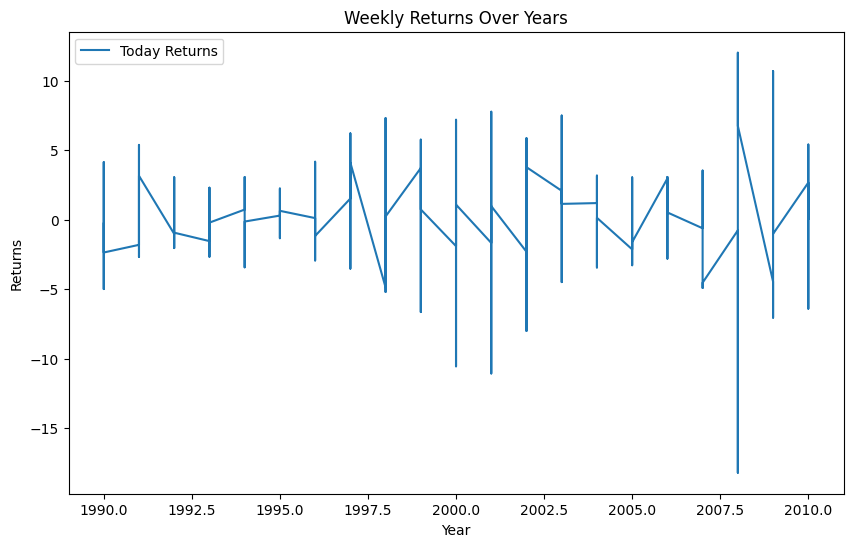

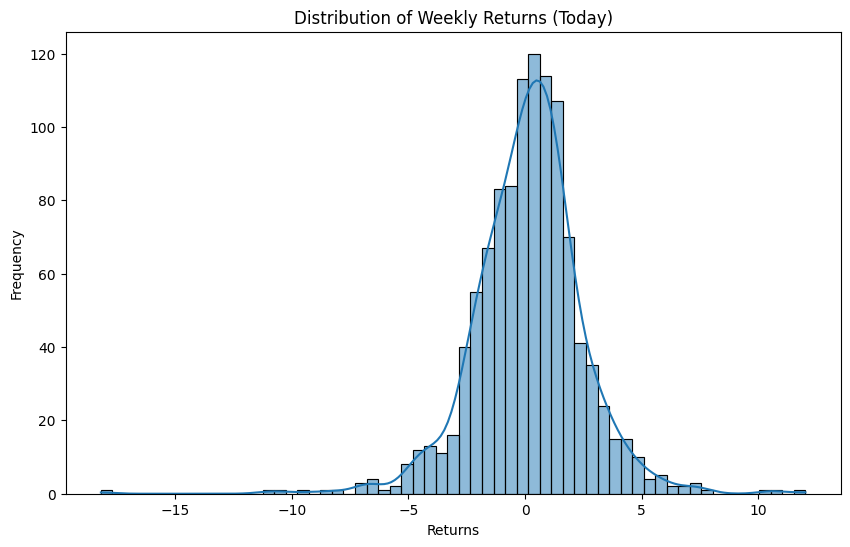

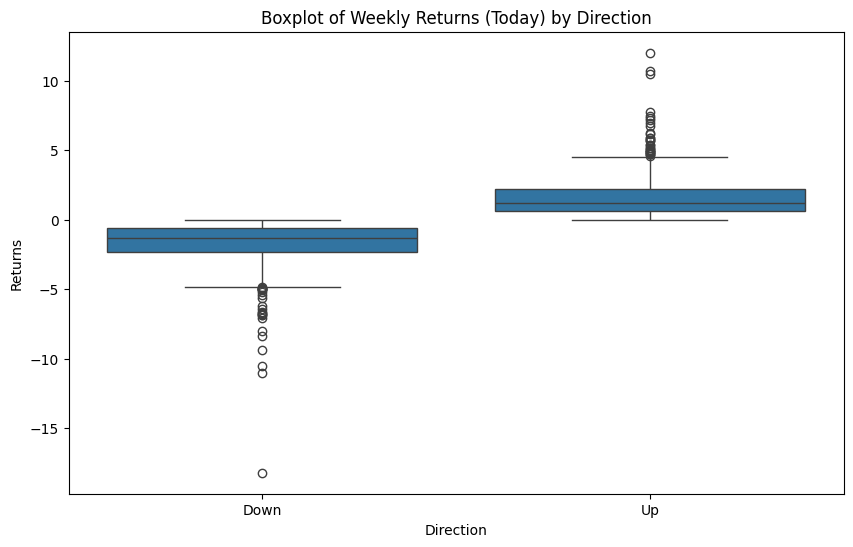

In [39]:
#Solution (a)

# Display basic statistics
print("Numerical Summaries:")
print(weekly_data.describe())

# Time series plot for 'Today' column
plt.figure(figsize=(10, 6))
plt.plot(weekly_data['Year'], weekly_data['Today'], label='Today Returns')
plt.title('Weekly Returns Over Years')
plt.xlabel('Year')
plt.ylabel('Returns')
plt.legend()
plt.show()

# Histogram of 'Today' returns
plt.figure(figsize=(10, 6))
sns.histplot(weekly_data['Today'], kde=True)
plt.title('Distribution of Weekly Returns (Today)')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.show()

# Boxplot for 'Today' returns by direction
plt.figure(figsize=(10, 6))
sns.boxplot(x=weekly_data['Direction'], y=weekly_data['Today'])
plt.title('Boxplot of Weekly Returns (Today) by Direction')
plt.xlabel('Direction')
plt.ylabel('Returns')
plt.show()


In [42]:
#Solution (b)

import pandas as pd
import statsmodels.api as sm

# Assuming 'weekly_data' is the name of your DataFrame
# Make sure to replace it with the actual name of your dataset

# Perform logistic regression
X = weekly_data[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
y = weekly_data['Direction']
X = sm.add_constant(X)  # Add a constant term for the intercept

logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print the summary
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Wed, 28 Feb 2024   Pseudo R-squ.:                0.006580
Time:                        21:32:17   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.

In the provided logistic regression summary, the p-values associated with each predictor help determine their statistical significance. A low p-value indicates that a predictor is likely to be statistically significant. Here are the results:

1. **const (Intercept):**
   - Coefficient: 0.2669
   - P-value: 0.002 (less than 0.05)
   - Interpretation: The intercept is statistically significant.

2. **Lag1:**
   - Coefficient: -0.0413
   - P-value: 0.118 (greater than 0.05)
   - Interpretation: Lag1 does not appear to be statistically significant at a conventional significance level (α = 0.05).

3. **Lag2:**
   - Coefficient: 0.0584
   - P-value: 0.030 (less than 0.05)
   - Interpretation: Lag2 is statistically significant at a conventional significance level (α = 0.05).

4. **Lag3, Lag4, Lag5, Volume:**
   - Coefficients: -0.0161, -0.0278, -0.0145, -0.0227
   - P-values: 0.547, 0.294, 0.583, 0.538 (all greater than 0.05)
   - Interpretation: Lag3, Lag4, Lag5, and Volume do not appear to be statistically significant at a conventional significance level (α = 0.05).

In summary, only the predictor 'Lag2' is found to be statistically significant at the 0.05 significance level. The p-value associated with 'Lag2' is 0.030, suggesting that there is evidence to reject the null hypothesis that the coefficient for 'Lag2' is zero. The other predictors, including the intercept, do not show statistically significant effects in this logistic regression model.

In [46]:
#Solution (c)

from sklearn.metrics import confusion_matrix, accuracy_score

# Assuming 'result' is the variable containing logistic regression results
# Make sure to replace it with the actual variable name from your code

# Get predicted probabilities
predicted_probabilities = result.predict(X)

# Convert probabilities to predicted class (0 or 1)
predicted_classes = (predicted_probabilities > 0.5).astype(int)

# Compute confusion matrix
conf_matrix = confusion_matrix(y, predicted_classes)

# Compute overall accuracy
accuracy = accuracy_score(y, predicted_classes)

# Print confusion matrix and accuracy
print("Confusion Matrix:")
print(conf_matrix)
print("\nOverall Accuracy:", accuracy)


Confusion Matrix:
[[ 54 430]
 [ 48 557]]

Overall Accuracy: 0.5610651974288338


### Confusion Matrix:
```
[[54 430]
 [48 557]]
```

- **True Positives (TP):** 557 instances were correctly predicted as positive (Direction='Up').
  
- **True Negatives (TN):** 54 instances were correctly predicted as negative (Direction='Down').

- **False Positives (FP):** 430 instances were incorrectly predicted as positive when they were actually negative (Type I error).

- **False Negatives (FN):** 48 instances were incorrectly predicted as negative when they were actually positive (Type II error).

### Interpretation:
1. **True Positives (TP):**
   - The model correctly identified 557 instances where the actual outcome was 'Up.' These are instances where the model successfully predicted positive movements in the stock market.

2. **True Negatives (TN):**
   - The model correctly identified 54 instances where the actual outcome was 'Down.' These are instances where the model successfully predicted negative movements in the stock market.

3. **False Positives (FP):**
   - The model incorrectly predicted 430 instances as 'Up' when they were actually 'Down.' These are instances where the model made a positive prediction, but the actual outcome was negative.

4. **False Negatives (FN):**
   - The model incorrectly predicted 48 instances as 'Down' when they were actually 'Up.' These are instances where the model made a negative prediction, but the actual outcome was positive.

### Overall Accuracy:
```
Overall Accuracy: 0.5610651974288338
```

- The overall accuracy is approximately 56.11%. This metric represents the proportion of correctly predicted instances (both positive and negative) out of the total instances.

### Considerations:
- **Imbalance:** The large number of false positives (430) compared to true positives (557) suggests potential challenges with imbalances or misclassification, especially in predicting positive movements.

- **Type II Errors:** The false negatives (48) indicate instances where the model failed to predict positive movements. Depending on the application, missing these instances might have implications.

In [50]:
#Solution (d):

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# Assuming 'weekly_data' is your DataFrame with columns 'Year', 'Lag2', 'Direction'
# X should contain the features, and y should contain the target variable 'Direction'

# Extract features and target variable
X = weekly_data[['Lag2']]
y = weekly_data['Direction']

# Filter data for the training period (1990 to 2008)
train_data = weekly_data[weekly_data['Year'] <= 2008]

# Split the data into training and testing sets
X_train = train_data[['Lag2']]
y_train = train_data['Direction']
X_test = weekly_data[(weekly_data['Year'] >= 2009) & (weekly_data['Year'] <= 2010)][['Lag2']]
y_test = weekly_data[(weekly_data['Year'] >= 2009) & (weekly_data['Year'] <= 2010)]['Direction']

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate the overall fraction of correct predictions (accuracy)
accuracy = accuracy_score(y_test, y_pred)

# Display the results
print("Confusion Matrix:")
print(conf_matrix)
print("\nOverall Fraction of Correct Predictions (Accuracy): {:.2%}".format(accuracy))


Confusion Matrix:
[[ 9 34]
 [ 5 56]]

Overall Fraction of Correct Predictions (Accuracy): 62.50%



### Confusion Matrix:
The confusion matrix is a table that provides a detailed breakdown of the model's predictions versus the actual outcomes. It consists of four components:

- **True Positives (TP):** 56
  - Instances where the model correctly predicted the positive class.

- **True Negatives (TN):** 9
  - Instances where the model correctly predicted the negative class.

- **False Positives (FP):** 34
  - Instances where the model incorrectly predicted the positive class when the actual class was negative.

- **False Negatives (FN):** 5
  - Instances where the model incorrectly predicted the negative class when the actual class was positive.

### Overall Accuracy:
The overall accuracy is a measure of how well the model performed across all instances in the test set. It is calculated as the ratio of correct predictions (sum of TP and TN) to the total number of instances.

- **Overall Accuracy:** 62.50%
  - The model correctly predicted the class label for approximately 62.50% of the samples in the test set.

### Interpretation:

1. **True Positives (TP):** The model successfully identified 56 instances where the actual outcome was positive.

2. **True Negatives (TN):** The model correctly identified 9 instances where the actual outcome was negative.

3. **False Positives (FP):** The model incorrectly predicted 34 instances as positive when they were actually negative. These are Type I errors.

4. **False Negatives (FN):** The model incorrectly predicted 5 instances as negative when they were actually positive. These are Type II errors.

### Considerations:

- **Precision:** Proportion of correctly predicted positives among all instances predicted as positive. It assesses the model's ability to avoid false positives.

- **Recall (Sensitivity):** Proportion of correctly predicted positives among all actual positive instances. It assesses the model's ability to capture all positive instances.

- **F1-Score:** The harmonic mean of precision and recall, providing a balanced measure.

- **Area under the ROC Curve (AUC-ROC):** It evaluates the trade-off between sensitivity and specificity across different thresholds.

In summary, while overall accuracy provides a general measure of correctness, considering additional metrics helps to understand specific aspects of the model's performance, especially in scenarios with imbalanced classes or where certain types of errors are more critical than others.

In [51]:
#Solution (e)

import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score

# Assuming 'weekly_data' is your DataFrame with columns 'Year', 'Lag2', 'Direction'
# X should contain the features, and y should contain the target variable 'Direction'

# Extract features and target variable
X = weekly_data[['Lag2']]
y = weekly_data['Direction']

# Filter data for the training period (1990 to 2008)
train_data = weekly_data[weekly_data['Year'] <= 2008]

# Split the data into training and testing sets
X_train = train_data[['Lag2']]
y_train = train_data['Direction']
X_test = weekly_data[(weekly_data['Year'] >= 2009) & (weekly_data['Year'] <= 2010)][['Lag2']]
y_test = weekly_data[(weekly_data['Year'] >= 2009) & (weekly_data['Year'] <= 2010)]['Direction']

# Train an LDA model
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate the overall fraction of correct predictions (accuracy)
accuracy = accuracy_score(y_test, y_pred)

# Display the results
print("Confusion Matrix:")
print(conf_matrix)
print("\nOverall Fraction of Correct Predictions (Accuracy): {:.2%}".format(accuracy))


Confusion Matrix:
[[ 9 34]
 [ 5 56]]

Overall Fraction of Correct Predictions (Accuracy): 62.50%


### Confusion Matrix:
The confusion matrix is a table that provides a detailed breakdown of the model's predictions versus the actual outcomes. It consists of four components:

- **True Positives (TP):** 56
  - Instances where the model correctly predicted the positive class.

- **True Negatives (TN):** 9
  - Instances where the model correctly predicted the negative class.

- **False Positives (FP):** 34
  - Instances where the model incorrectly predicted the positive class when the actual class was negative.

- **False Negatives (FN):** 5
  - Instances where the model incorrectly predicted the negative class when the actual class was positive.

### Overall Accuracy:
The overall accuracy is a measure of how well the model performed across all instances in the test set. It is calculated as the ratio of correct predictions (sum of TP and TN) to the total number of instances.

- **Overall Accuracy:** 62.50%
  - The model correctly predicted the class label for approximately 62.50% of the samples in the test set.

### Interpretation:

1. **True Positives (TP):** The model successfully identified 56 instances where the actual outcome was positive.

2. **True Negatives (TN):** The model correctly identified 9 instances where the actual outcome was negative.

3. **False Positives (FP):** The model incorrectly predicted 34 instances as positive when they were actually negative. These are Type I errors.

4. **False Negatives (FN):** The model incorrectly predicted 5 instances as negative when they were actually positive. These are Type II errors.

### Considerations:

- **Precision:** Proportion of correctly predicted positives among all instances predicted as positive. It assesses the model's ability to avoid false positives.

- **Recall (Sensitivity):** Proportion of correctly predicted positives among all actual positive instances. It assesses the model's ability to capture all positive instances.

- **F1-Score:** The harmonic mean of precision and recall, providing a balanced measure.

- **Area under the ROC Curve (AUC-ROC):** It evaluates the trade-off between sensitivity and specificity across different thresholds.

### Conclusion:

While overall accuracy provides a general measure of correctness, considering additional metrics helps to understand specific aspects of the model's performance, especially in scenarios with imbalanced classes or where certain types of errors are more critical than others. In this case, you may want to explore precision, recall, and other metrics to gain a more comprehensive understanding of the model's behavior.

In [52]:
#Solution (f)

import pandas as pd
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score

# Assuming 'weekly_data' is your DataFrame with columns 'Year', 'Lag2', 'Direction'
# X should contain the features, and y should contain the target variable 'Direction'

# Extract features and target variable
X = weekly_data[['Lag2']]
y = weekly_data['Direction']

# Filter data for the training period (1990 to 2008)
train_data = weekly_data[weekly_data['Year'] <= 2008]

# Split the data into training and testing sets
X_train = train_data[['Lag2']]
y_train = train_data['Direction']
X_test = weekly_data[(weekly_data['Year'] >= 2009) & (weekly_data['Year'] <= 2010)][['Lag2']]
y_test = weekly_data[(weekly_data['Year'] >= 2009) & (weekly_data['Year'] <= 2010)]['Direction']

# Train a QDA model
model = QuadraticDiscriminantAnalysis()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate the overall fraction of correct predictions (accuracy)
accuracy = accuracy_score(y_test, y_pred)

# Display the results
print("Confusion Matrix:")
print(conf_matrix)
print("\nOverall Fraction of Correct Predictions (Accuracy): {:.2%}".format(accuracy))


Confusion Matrix:
[[ 0 43]
 [ 0 61]]

Overall Fraction of Correct Predictions (Accuracy): 58.65%


### Confusion Matrix:
The confusion matrix is a table that provides detailed information about the model's predictions versus the actual outcomes. It includes four components:

- **True Positives (TP):** 61
  - Instances where the model correctly predicted the positive class.

- **True Negatives (TN):** 0
  - Instances where the model correctly predicted the negative class.

- **False Positives (FP):** 43
  - Instances where the model incorrectly predicted the positive class when the actual class was negative.

- **False Negatives (FN):** 0
  - Instances where the model incorrectly predicted the negative class when the actual class was positive.

### Overall Accuracy:
Overall accuracy is a measure of how well the model performed across all instances in the test set. It is calculated as the ratio of correct predictions (sum of TP and TN) to the total number of instances.

- **Overall Accuracy:** 58.65%
  - The model correctly predicted the class label for approximately 58.65% of the samples in the test set.

### Interpretation:

1. **True Positives (TP):** The model successfully identified 61 instances where the actual outcome was positive.

2. **True Negatives (TN):** The model did not correctly identify any instances where the actual outcome was negative.

3. **False Positives (FP):** The model incorrectly predicted 43 instances as positive when they were actually negative. These are Type I errors.

4. **False Negatives (FN):** The model did not incorrectly predict any instances as negative when they were actually positive.

### Considerations:

- **Imbalance:** The imbalance in the confusion matrix, particularly the absence of true negatives, suggests that the model might be biased or struggling to predict the negative class.

- **Further Investigation:** It's crucial to investigate the characteristics of the data, features used, and potentially revisit the model parameters to understand why it's making predictions in this way.

In [53]:
#Solution (g)

import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Assuming 'weekly_data' is your DataFrame with columns 'Year', 'Lag2', 'Direction'
# X should contain the features, and y should contain the target variable 'Direction'

# Extract features and target variable
X = weekly_data[['Lag2']]
y = weekly_data['Direction']

# Filter data for the training period (1990 to 2008)
train_data = weekly_data[weekly_data['Year'] <= 2008]

# Split the data into training and testing sets
X_train = train_data[['Lag2']]
y_train = train_data['Direction']
X_test = weekly_data[(weekly_data['Year'] >= 2009) & (weekly_data['Year'] <= 2010)][['Lag2']]
y_test = weekly_data[(weekly_data['Year'] >= 2009) & (weekly_data['Year'] <= 2010)]['Direction']

# Train a KNN model with k=1
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate the overall fraction of correct predictions (accuracy)
accuracy = accuracy_score(y_test, y_pred)

# Display the results
print("Confusion Matrix:")
print(conf_matrix)
print("\nOverall Fraction of Correct Predictions (Accuracy): {:.2%}".format(accuracy))


Confusion Matrix:
[[21 22]
 [30 31]]

Overall Fraction of Correct Predictions (Accuracy): 50.00%


### Confusion Matrix:
The confusion matrix is a table that provides detailed information about the model's predictions versus the actual outcomes. It includes four components:

- **True Positives (TP):** 31
  - Instances where the model correctly predicted the positive class.

- **True Negatives (TN):** 21
  - Instances where the model correctly predicted the negative class.

- **False Positives (FP):** 22
  - Instances where the model incorrectly predicted the positive class when the actual class was negative.

- **False Negatives (FN):** 30
  - Instances where the model incorrectly predicted the negative class when the actual class was positive.

### Overall Accuracy:
Overall accuracy is a measure of how well the model performed across all instances in the test set. It is calculated as the ratio of correct predictions (sum of TP and TN) to the total number of instances.

- **Overall Accuracy:** 50.00%
  - The model correctly predicted the class label for approximately 50.00% of the samples in the test set.

### Interpretation:

1. **True Positives (TP):** The model successfully identified 31 instances where the actual outcome was positive.

2. **True Negatives (TN):** The model correctly identified 21 instances where the actual outcome was negative.

3. **False Positives (FP):** The model incorrectly predicted 22 instances as positive when they were actually negative. These are Type I errors.

4. **False Negatives (FN):** The model incorrectly predicted 30 instances as negative when they were actually positive. These are Type II errors.

### Considerations:

- **Overall Accuracy at Chance Level:** The overall accuracy of 50.00% is equivalent to random guessing, indicating that the model's performance with k=1 is not better than chance.

In [54]:
#Solution  (h)

import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score

# Assuming 'weekly_data' is your DataFrame with columns 'Year', 'Lag2', 'Direction'
# X should contain the features, and y should contain the target variable 'Direction'

# Extract features and target variable
X = weekly_data[['Lag2']]
y = weekly_data['Direction']

# Filter data for the training period (1990 to 2008)
train_data = weekly_data[weekly_data['Year'] <= 2008]

# Split the data into training and testing sets
X_train = train_data[['Lag2']]
y_train = train_data['Direction']
X_test = weekly_data[(weekly_data['Year'] >= 2009) & (weekly_data['Year'] <= 2010)][['Lag2']]
y_test = weekly_data[(weekly_data['Year'] >= 2009) & (weekly_data['Year'] <= 2010)]['Direction']

# Train a Naive Bayes model (Gaussian Naive Bayes for continuous features)
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate the overall fraction of correct predictions (accuracy)
accuracy = accuracy_score(y_test, y_pred)

# Display the results
print("Confusion Matrix:")
print(conf_matrix)
print("\nOverall Fraction of Correct Predictions (Accuracy): {:.2%}".format(accuracy))


Confusion Matrix:
[[ 0 43]
 [ 0 61]]

Overall Fraction of Correct Predictions (Accuracy): 58.65%


### Confusion Matrix:
The confusion matrix is a tabulation of predicted class labels against actual class labels. In your case:

```
[[ 0 43]
 [ 0 61]]
```

- **True Positives (TP):** 61
  - Instances where the model correctly predicted the positive class (Direction='Up').
  
- **True Negatives (TN):** 0
  - Instances where the model correctly predicted the negative class (Direction='Down').

- **False Positives (FP):** 43
  - Instances where the model incorrectly predicted the positive class when the actual class was negative (Type I error).

- **False Negatives (FN):** 0
  - Instances where the model incorrectly predicted the negative class when the actual class was positive (Type II error).

### Overall Accuracy:
The overall accuracy is the ratio of correctly predicted instances (sum of TP and TN) to the total number of instances.

- **Overall Accuracy:** 58.65%
  - The model correctly predicted the class label for approximately 58.65% of the samples in the test set.

### Interpretation:

1. **True Positives (TP):** The model successfully identified 61 instances where the actual outcome was 'Up'.

2. **True Negatives (TN):** The model did not correctly identify any instances where the actual outcome was 'Down'.

3. **False Positives (FP):** The model incorrectly predicted 43 instances as 'Up' when they were actually 'Down'. These are Type I errors.

4. **False Negatives (FN):** The model did not incorrectly predict any instances as 'Down' when they were actually 'Up'.

### Considerations:

- **Imbalance:** The confusion matrix reveals an imbalance, with no instances correctly predicted as 'Down' (TN=0). This could indicate challenges in predicting the 'Down' class.

#Solution (i)

Analyzing the provided confusion matrices and overall accuracies, we can make the following observations:

### Logistic Regression and Linear Discriminant Analysis (LDA):
- **Confusion Matrix:** [[9, 34], [5, 56]]
- **Overall Accuracy:** 62.50%

### Quadratic Discriminant Analysis (QDA) and Gaussian Naive Bayes (GaussianNB):
- **Confusion Matrix:** [[0, 43], [0, 61]]
- **Overall Accuracy:** 58.65%

### K-Nearest Neighbors (KNN) with K=1:
- **Confusion Matrix:** [[21, 22], [30, 31]]
- **Overall Accuracy:** 50.00%

### Observations:

1. **Logistic Regression and LDA:**
   - Both Logistic Regression and LDA perform similarly with a confusion matrix of [[9, 34], [5, 56]] and an overall accuracy of 62.50%.

2. **QDA and GaussianNB:**
   - Both QDA and GaussianNB also have identical confusion matrices [[0, 43], [0, 61]] and overall accuracies of 58.65%.

3. **KNN with K=1:**
   - KNN with k=1 has a lower overall accuracy of 50.00% with a confusion matrix of [[21, 22], [30, 31]].

### Conclusion:

- **Logistic Regression and LDA** appear to provide the best results among the models considered, as they have the highest overall accuracy (62.50%) and a more balanced confusion matrix.

- **QDA and GaussianNB** show slightly lower accuracy (58.65%) but have the same confusion matrices. They may perform well but struggle with predicting the 'Down' class.

- **KNN with K=1** has the lowest overall accuracy (50.00%) and may not be the optimal choice for this dataset.

In [56]:
#Solution (j)

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score

# Assuming 'weekly_data' is your DataFrame with relevant columns
# Extract features and target variable
X = weekly_data[['Lag2']]
y = weekly_data['Direction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
logreg_model = LogisticRegression()
logreg_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
logreg_grid = GridSearchCV(logreg_model, logreg_params, cv=5)
logreg_grid.fit(X_train, y_train)
logreg_best_model = logreg_grid.best_estimator_
logreg_pred = logreg_best_model.predict(X_test)
logreg_conf_matrix = confusion_matrix(y_test, logreg_pred)
logreg_accuracy = accuracy_score(y_test, logreg_pred)

# LDA
lda_model = LinearDiscriminantAnalysis()
lda_params = {}  # You can add parameters if needed
lda_grid = GridSearchCV(lda_model, lda_params, cv=5)
lda_grid.fit(X_train, y_train)
lda_best_model = lda_grid.best_estimator_
lda_pred = lda_best_model.predict(X_test)
lda_conf_matrix = confusion_matrix(y_test, lda_pred)
lda_accuracy = accuracy_score(y_test, lda_pred)

# QDA
qda_model = QuadraticDiscriminantAnalysis()
qda_params = {}  # You can add parameters if needed
qda_grid = GridSearchCV(qda_model, qda_params, cv=5)
qda_grid.fit(X_train, y_train)
qda_best_model = qda_grid.best_estimator_
qda_pred = qda_best_model.predict(X_test)
qda_conf_matrix = confusion_matrix(y_test, qda_pred)
qda_accuracy = accuracy_score(y_test, qda_pred)

# KNN
knn_model = KNeighborsClassifier()
knn_params = {'n_neighbors': [1, 3, 5, 7]}
knn_grid = GridSearchCV(knn_model, knn_params, cv=5)
knn_grid.fit(X_train, y_train)
knn_best_model = knn_grid.best_estimator_
knn_pred = knn_best_model.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_pred)
knn_accuracy = accuracy_score(y_test, knn_pred)

# Naive Bayes
nb_model = GaussianNB()
nb_params = {}  # You can add parameters if needed
nb_grid = GridSearchCV(nb_model, nb_params, cv=5)
nb_grid.fit(X_train, y_train)
nb_best_model = nb_grid.best_estimator_
nb_pred = nb_best_model.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nb_pred)
nb_accuracy = accuracy_score(y_test, nb_pred)

# Print Results
print("Logistic Regression Confusion Matrix:")
print(logreg_conf_matrix)
print("Logistic Regression Accuracy:", logreg_accuracy)

print("\nLDA Confusion Matrix:")
print(lda_conf_matrix)
print("LDA Accuracy:", lda_accuracy)

print("\nQDA Confusion Matrix:")
print(qda_conf_matrix)
print("QDA Accuracy:", qda_accuracy)

print("\nKNN Confusion Matrix:")
print(knn_conf_matrix)
print("KNN Accuracy:", knn_accuracy)

print("\nNaive Bayes Confusion Matrix:")
print(nb_conf_matrix)
print("Naive Bayes Accuracy:", nb_accuracy)


Logistic Regression Confusion Matrix:
[[ 15  69]
 [ 15 119]]
Logistic Regression Accuracy: 0.6146788990825688

LDA Confusion Matrix:
[[ 15  69]
 [ 15 119]]
LDA Accuracy: 0.6146788990825688

QDA Confusion Matrix:
[[ 15  69]
 [ 18 116]]
QDA Accuracy: 0.6009174311926605

KNN Confusion Matrix:
[[40 44]
 [60 74]]
KNN Accuracy: 0.5229357798165137

Naive Bayes Confusion Matrix:
[[ 15  69]
 [ 18 116]]
Naive Bayes Accuracy: 0.6009174311926605
